In [1]:
%matplotlib inline

In [46]:
import numpy as np   
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import pandas as pd    
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn import metrics
import matplotlib.pylab as plt
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression

In [3]:
# reading the CSV file into pandas dataframe
car_data = pd.read_csv("cars-dataset.csv")
car_data.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [4]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [5]:
print(car_data.isnull().any())

car name    False
cyl         False
disp        False
hp          False
wt          False
acc         False
yr          False
mpg         False
dtype: bool


In [6]:
print((car_data<0).any())

car name     True
cyl         False
disp        False
hp           True
wt          False
acc         False
yr          False
mpg         False
dtype: bool


In [7]:
car_data = car_data.replace('?', np.nan)
car_data[car_data.isnull().any(axis=1)]

,car name,cyl,disp,hp,wt,acc,yr,mpg
32,ford pinto,4,98.0,NaN,2046,19.0,71,25.0
126,ford maverick,6,200.0,NaN,2875,17.0,74,21.0
330,renault lecar deluxe,4,85.0,NaN,1835,17.3,80,40.9
336,ford mustang cobra,4,140.0,NaN,2905,14.3,80,23.6
354,renault 18i,4,100.0,NaN,2320,15.8,81,34.5
374,amc concord dl,4,151.0,NaN,3035,20.5,82,23.0


In [8]:
#Car name is dropped because as it is not neccesary
car_data = car_data.drop('car name', axis=1)

In [9]:
car_data['hp'] = car_data['hp'].astype('float64')  # converting the hp column from object / string type to float

In [10]:
#replacing the missing values in 'hp' with median value of 'hp'
car_data = car_data.apply(lambda x: x.fillna(x.median()),axis=0) 
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
cyl     398 non-null int64
disp    398 non-null float64
hp      398 non-null float64
wt      398 non-null int64
acc     398 non-null float64
yr      398 non-null int64
mpg     398 non-null float64
dtypes: float64(4), int64(3)
memory usage: 21.8 KB


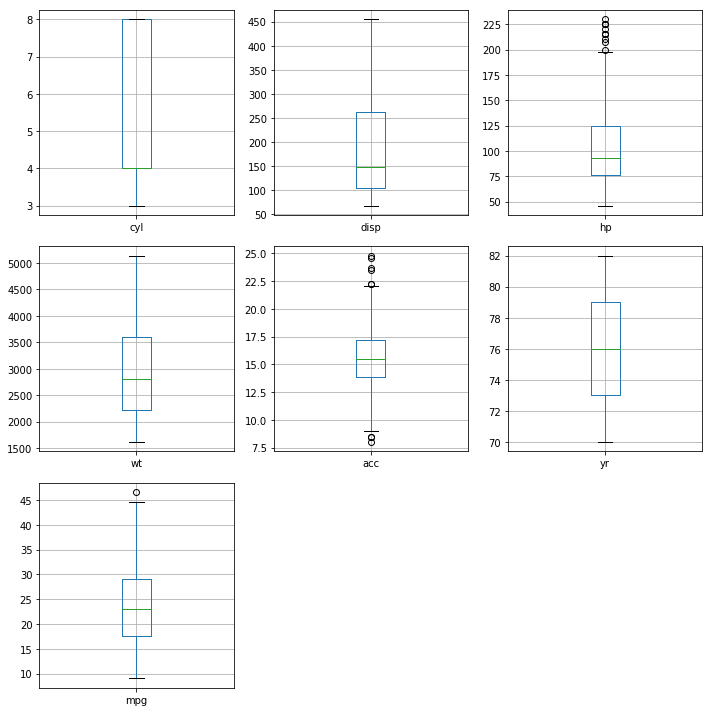

In [11]:
fig, axes = plt.subplots(3,3,figsize=(10,10)) # create figure and axes

for i,el in enumerate(list(car_data.columns.values)[:]):
    a = car_data.boxplot(el, ax=axes.flatten()[i])

fig.delaxes(axes[2,1]) # remove empty subplot
fig.delaxes(axes[2,2]) # remove empty subplot
plt.tight_layout() 
plt.show()

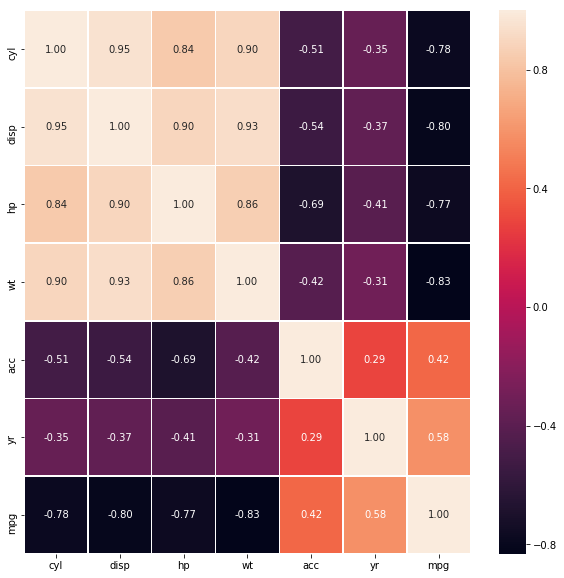

In [12]:
# Correlation
car_corr = car_data.corr()
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(car_corr,annot=True, linewidth=.5, fmt='.2f' , ax=ax)

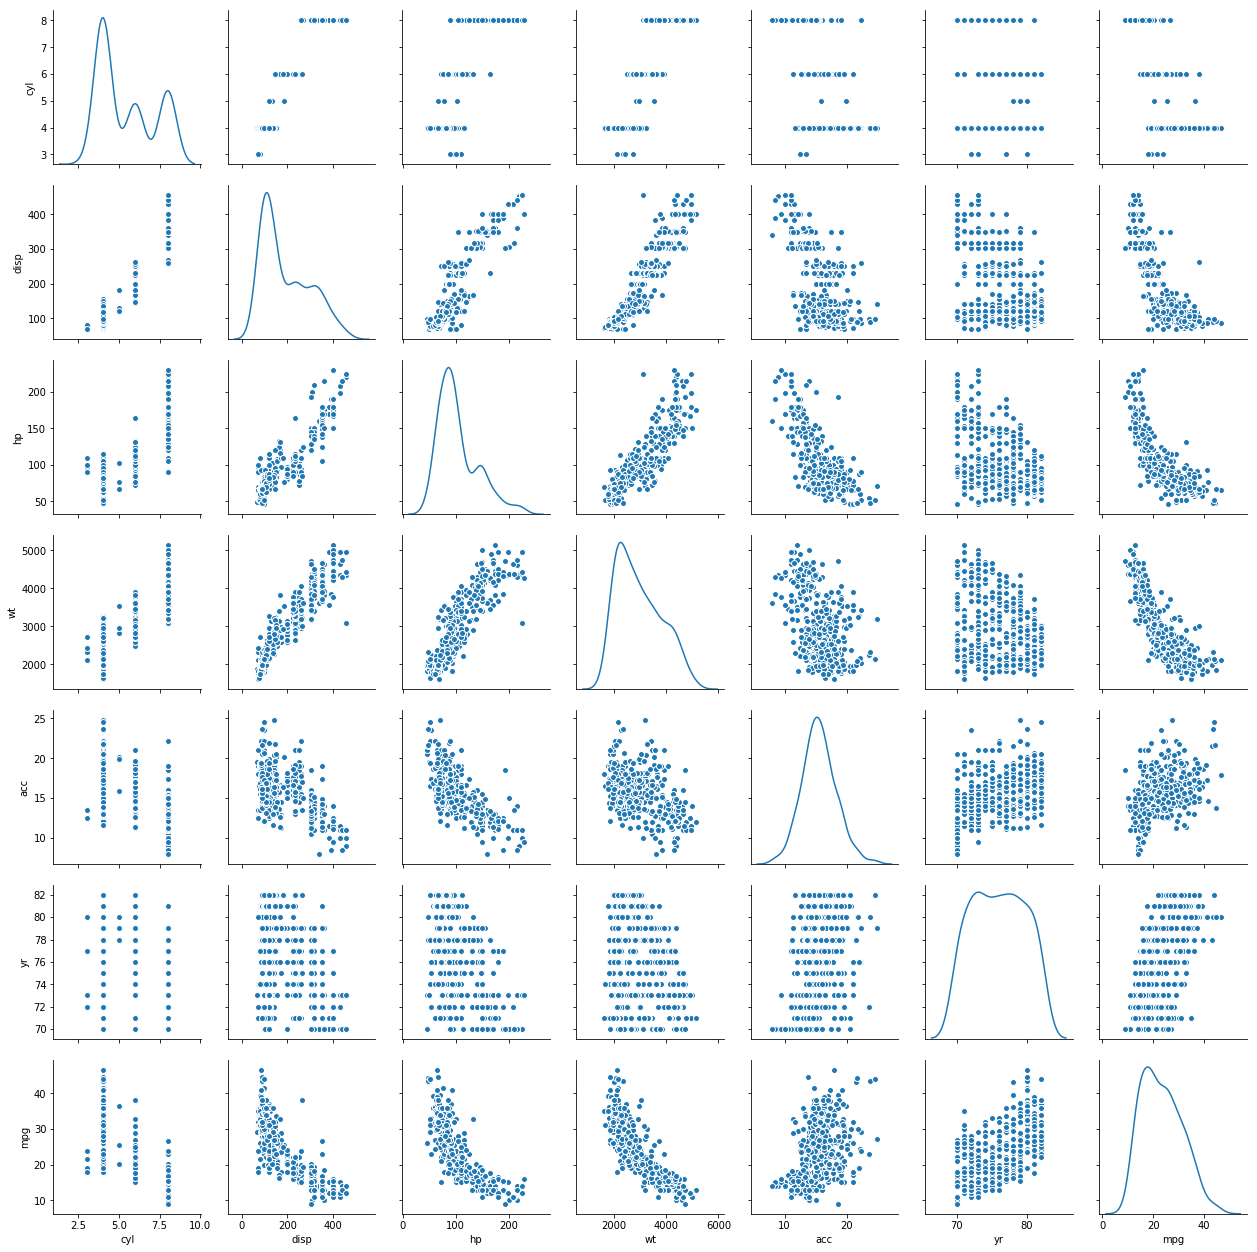

In [13]:
#pair plot analysis to visually check number of likely clusters
sns.pairplot(car_data, diag_kind='kde')

In [14]:
car_data.duplicated().any() # checking for duplicates rows as it doesn't have any it is showing false

False

In [15]:
numeric_col = car_data.select_dtypes(include=['float64','int64']).columns
car_data_z = car_data
car_data_z[numeric_col] = car_data[numeric_col].apply(zscore)
car_data_z.head()

,cyl,disp,hp,wt,acc,yr,mpg
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,-0.706439
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,-1.090751
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,-0.706439
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,-0.962647
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,-0.834543


In [16]:
car_data_z.describe().T

,count,mean,std,min,25%,50%,75%,max
cyl,398.0,-5.171742e-16,1.001259,-1.444949,-0.856321,-0.856321,1.498191,1.498191
disp,398.0,-8.312725e-17,1.001259,-1.204411,-0.856318,-0.431404,0.658488,2.511784
hp,398.0,1.458911e-16,1.001259,-1.527300,-0.741436,-0.283016,0.542140,3.292662
wt,398.0,-9.902743e-17,1.001259,-1.604943,-0.882827,-0.197362,0.753834,2.565185
acc,398.0,8.982206e-17,1.001259,-2.747814,-0.632879,-0.024722,0.583435,3.351912
yr,398.0,-8.837152e-16,1.001259,-1.627426,-0.815074,-0.002721,0.809631,1.621983
mpg,398.0,2.761610e-16,1.001259,-1.859374,-0.770491,-0.065919,0.702705,2.957335


In [17]:
car_data_z.shape

(398, 7)

In [18]:
car_data_z[car_data_z['hp'] > 3].shape

(5, 7)

In [19]:
car_data_z = car_data_z[car_data_z['hp'] <= 3]

In [20]:
car_data_z[car_data_z['cyl'] > 3].shape

(0, 7)

In [21]:
car_data_z[car_data_z['disp'] > 3].shape

(0, 7)

In [22]:
car_data_z[car_data_z['wt'] > 3].shape

(0, 7)

In [23]:
car_data_z[car_data_z['acc'] > 3].shape

(2, 7)

In [24]:
car_data_z = car_data_z[car_data_z['acc'] <= 3]

In [25]:
car_data_z[car_data_z['mpg'] > 3].shape

(0, 7)

In [26]:
car_data_z.shape

(391, 7)

In [27]:
# Let us check optimal number of clusters-
cluster_range = range( 1, 11)
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(car_data_z)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia

# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,2604.101355
1,2,1226.518296
2,3,891.011860
3,4,686.358338
4,5,616.220656
5,6,558.904582
6,7,505.733754
7,8,462.304229
8,9,423.119463
9,10,400.426319


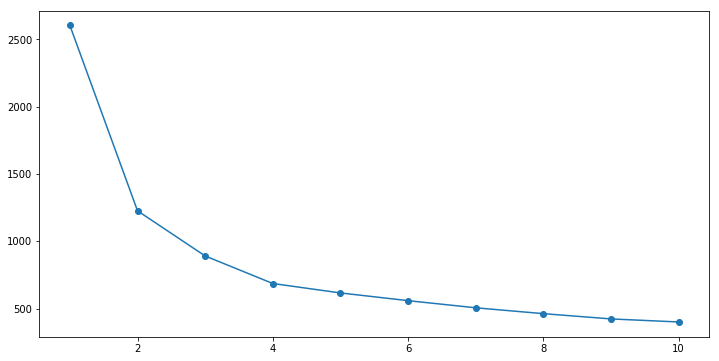

In [28]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [29]:
### optimal value of k is 4

In [30]:
cluster = KMeans( n_clusters = 4, random_state = 1 )
cluster.fit(car_data_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [31]:
# Get the centroids.... using function cluster_centers_

centroids = cluster.cluster_centers_
centroids

array([[-0.82478693, -0.782841  , -0.73371809, -0.77573996,  0.32247199,
         1.09975684,  1.1736015 ],
       [ 0.41249969,  0.29540402, -0.04711158,  0.33022596,  0.29841801,
         0.02435697, -0.49478247],
       [ 1.49819126,  1.45048677,  1.4225984 ,  1.39579417, -1.02157549,
        -0.63755982, -1.15537196],
       [-0.86226631, -0.8085232 , -0.55740678, -0.75863563,  0.32955478,
        -0.64549188,  0.20271132]])

In [32]:
# Let us put the raw centroid values into a dataframe under respective columns

centroid_df = pd.DataFrame(centroids, columns = list(car_data_z) )
centroid_df

,cyl,disp,hp,wt,acc,yr,mpg
0,-0.824787,-0.782841,-0.733718,-0.775740,0.322472,1.099757,1.173602
1,0.412500,0.295404,-0.047112,0.330226,0.298418,0.024357,-0.494782
2,1.498191,1.450487,1.422598,1.395794,-1.021575,-0.637560,-1.155372
3,-0.862266,-0.808523,-0.557407,-0.758636,0.329555,-0.645492,0.202711


In [33]:
prediction=cluster.predict(car_data_z)
car_data_z['prediction'] = prediction
car_data_z.groupby("prediction").count()

,cyl,disp,hp,wt,acc,yr,mpg
prediction,,,,,,,
0,112,112,112,112,112,112,112
1,90,90,90,90,90,90,90
2,90,90,90,90,90,90,90
3,99,99,99,99,99,99,99


In [35]:
car_data_z.head(20)

,cyl,disp,hp,wt,acc,yr,mpg,prediction
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,-0.706439,2
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,-1.090751,2
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,-0.706439,2
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,-0.962647,2
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,-0.834543,2
5,1.498191,2.262118,2.454408,1.620492,-2.021656,-1.627426,-1.090751,2
7,1.498191,2.367746,2.899730,1.586204,-2.566274,-1.627426,-1.218855,2
9,1.498191,1.887617,2.244844,1.039961,-2.566274,-1.627426,-1.090751,2
10,1.498191,1.820399,1.720935,0.700628,-2.021656,-1.627426,-1.090751,2
11,1.498191,1.407489,1.458981,0.755016,-2.747814,-1.627426,-1.218855,2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000207F1BDECF8>,
      dtype=object)

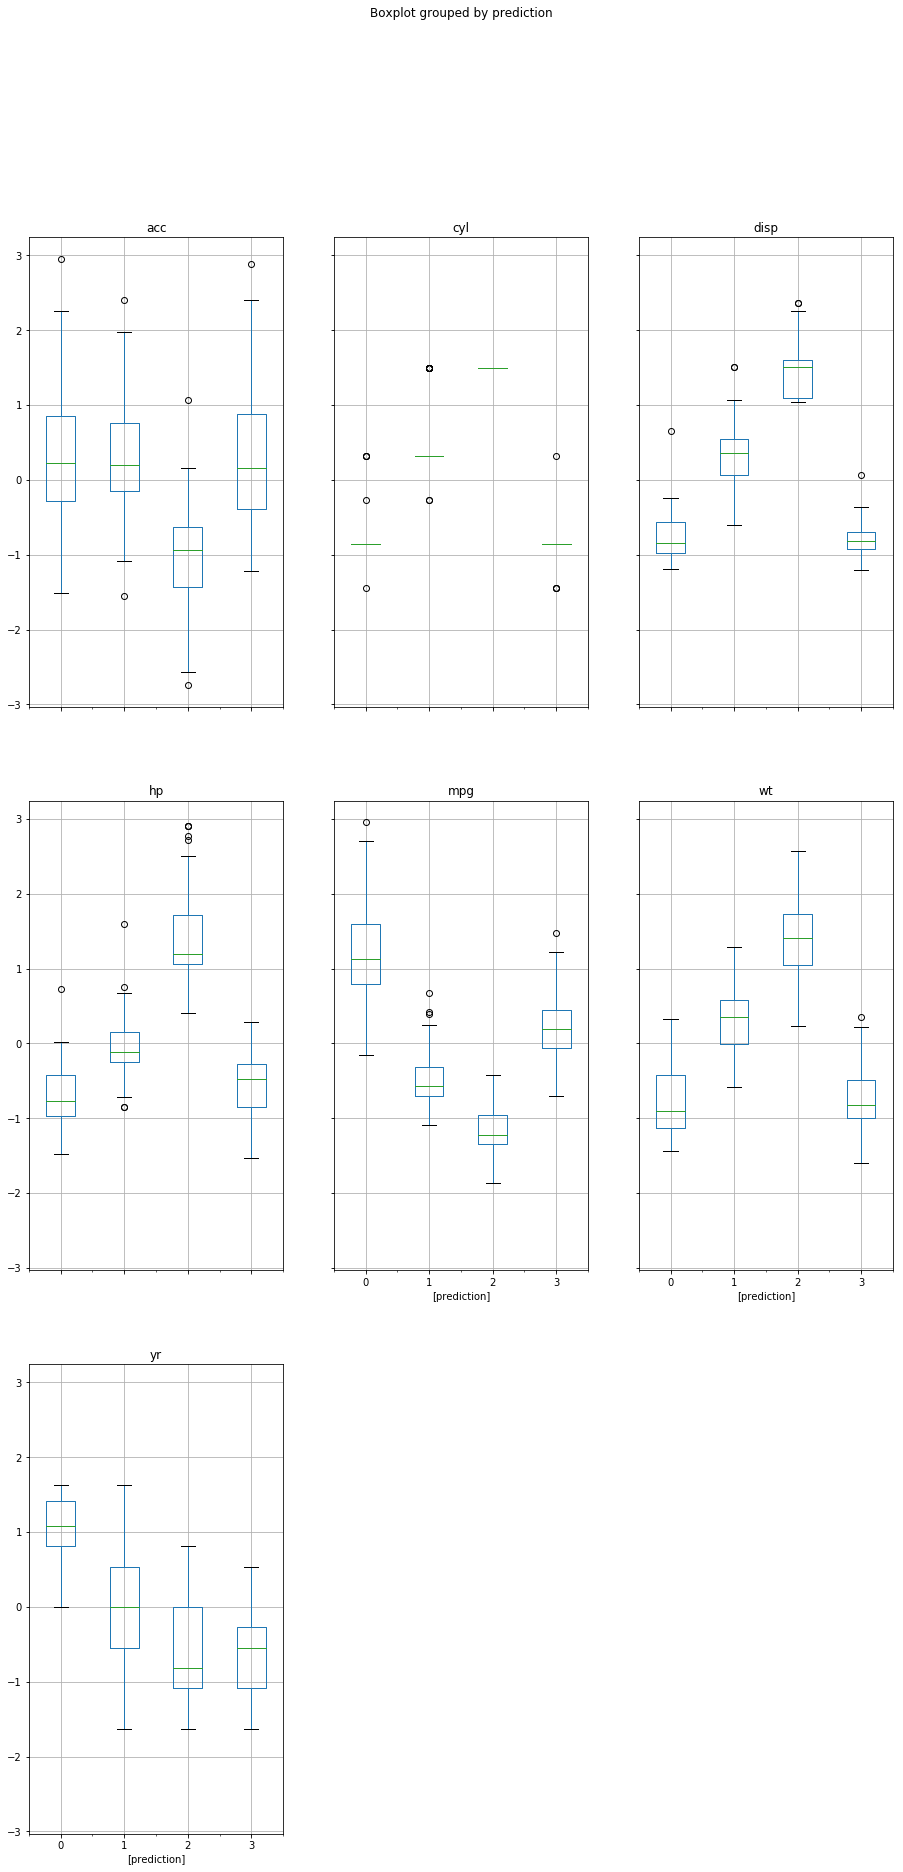

In [36]:
car_data_z.boxplot(by = 'prediction',  layout=(4,3), figsize=(15, 40))

In [40]:
car_0 = car_data_z[car_data_z['prediction']==0]
car_1 = car_data_z[car_data_z['prediction']==1]
car_2 = car_data_z[car_data_z['prediction']==2]
car_3 = car_data_z[car_data_z['prediction']==3]

In [58]:
# For prediction 0

In [43]:
# Copy all the predictor variables into X dataframe. Since 'mpg' is dependent variable drop it
X = car_0.drop({'mpg','prediction'}, axis=1)

# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
y = car_0[['mpg']]

In [44]:
# Split X and y into training and test set in 75:25 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [47]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [48]:
regression_model.score(X_train, y_train)

0.5833885332257225

In [57]:
# For prediction 1

In [49]:
# Copy all the predictor variables into X dataframe. Since 'mpg' is dependent variable drop it
X = car_1.drop({'mpg','prediction'}, axis=1)

# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
y = car_1[['mpg']]

# Split X and y into training and test set in 75:25 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [50]:
regression_model.score(X_train, y_train)

0.5019320336589757

In [56]:
# For prediction 2

In [51]:
# Copy all the predictor variables into X dataframe. Since 'mpg' is dependent variable drop it
X = car_2.drop({'mpg','prediction'}, axis=1)

# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
y = car_2[['mpg']]

# Split X and y into training and test set in 75:25 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [52]:
regression_model.score(X_train, y_train)

0.6602762164796291

In [55]:
# For prediction 3

In [53]:
# Copy all the predictor variables into X dataframe. Since 'mpg' is dependent variable drop it
X = car_3.drop({'mpg','prediction'}, axis=1)

# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
y = car_3[['mpg']]

# Split X and y into training and test set in 75:25 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [54]:
regression_model.score(X_train, y_train)

0.5781698805582749